# Ceneo Analyzer

## Biblioteki

In [26]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Lista kodów wszystkich produktów, o których zostały pobrane opinie

In [3]:
print(*[filename.split(".")[0] for filename in os.listdir("opinions")], sep="\n")

156802519
94103927


## Kod produktu, dla którego ma zostać wykonana analiza opinii 94103927

In [11]:
product_id = input("Podaj kod produktu w serwisie Ceneo.pl: ")

## Wczytanie do obiektu pandas.DataFrame opinii o wskazanym produkcie

In [12]:
opinions = pd.read_json(f"opinions/{product_id}.json")

In [ ]:
opinions

In [13]:
opinions.rating = opinions.rating.apply(lambda rate: rate.split("/")[0].replace(",",".")).astype(float)

## Podstawowe statystki

In [14]:
opinions_count = opinions.shape[0]
pros_count = opinions.pros.astype(bool).sum()
cons_count = opinions.cons.astype(bool).sum()
average_rating = opinions.rating.mean()

## Histogram częstości poszczególnych ocen w opiniach o produkcie
# add treshold

[Text(0, 0, ''),
 Text(0, 0, '2'),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '9'),
 Text(0, 0, '118')]

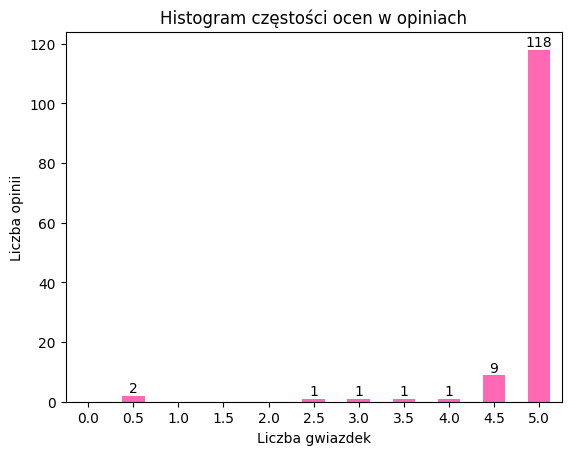

In [33]:
rating_distribution = opinions.rating.value_counts().reindex(np.arange(0,5.5,0.5), fill_value = 0.0)
fig, ax = plt.subplots()
rating_distribution.plot.bar(color = "hotpink")
plt.xticks(rotation=0)
plt.xlabel("Liczba gwiazdek")
plt.ylabel("Liczba opinii")
plt.title("Histogram częstości ocen w opiniach")
ax.bar_label(ax.containers[0], label_type="edge", fmt = lambda x: int(x) if x > 0 else "")

## Udział poszczególnych rekomendacji w opiniach o produkcie

In [ ]:
recommendation_distribution = opinions.recommendation.value_counts(dropna=False).reindex(["Polecam","Nie polecam",None])
recommendation_distribution.plot.pie(
label="",
colors=["seagreen","palevioletred","thistle"],
labels=["Polecam","Nie polecam","Nie mam zdania"]
)
plt.title("Histogram udziału rekomendacji w opiniach")

SyntaxError: invalid syntax. Perhaps you forgot a comma? (3858715636.py, line 4)

In [51]:
average_rating

4.845864661654136

In [ ]:
#opinions.rating
#opinions["rating"]